In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from PIL import Image
import cv2
from scipy.interpolate import interp1d
from scipy.interpolate import Rbf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.ndimage import convolve
from matplotlib import colors
from scipy import interpolate
from scipy.interpolate import PchipInterpolator
from scipy.interpolate import Akima1DInterpolator
from scipy.interpolate import CubicSpline
from scipy.interpolate import BSpline
from scipy.interpolate import make_interp_spline
from scipy.interpolate import make_lsq_spline
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.transforms import Bbox
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import IMPERIAL_LENGTH
from matplotlib_scalebar.scalebar import ScaleBar

In [4]:
plt.style.use?

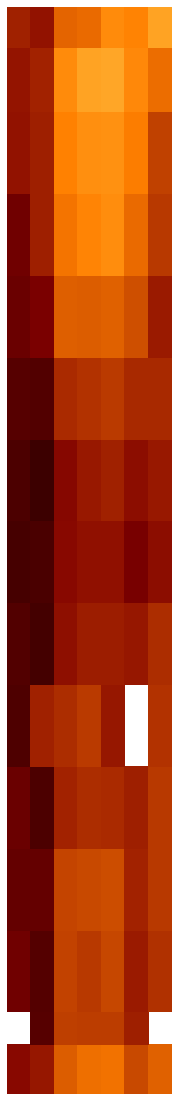

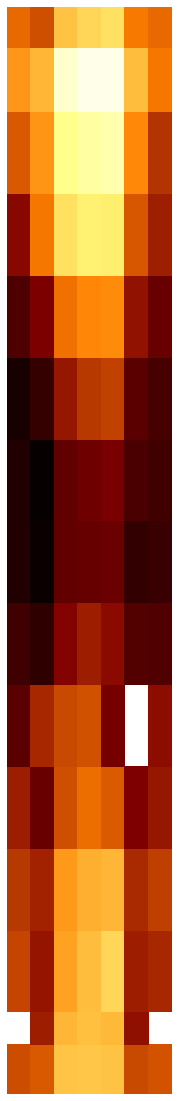

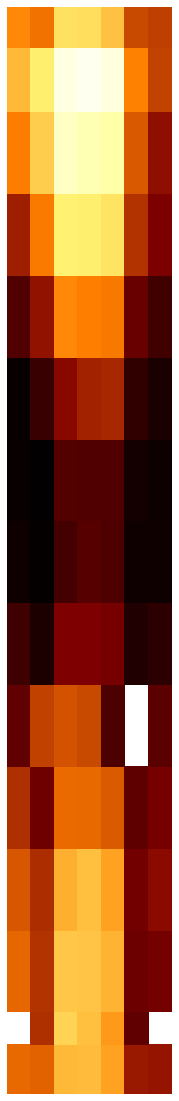

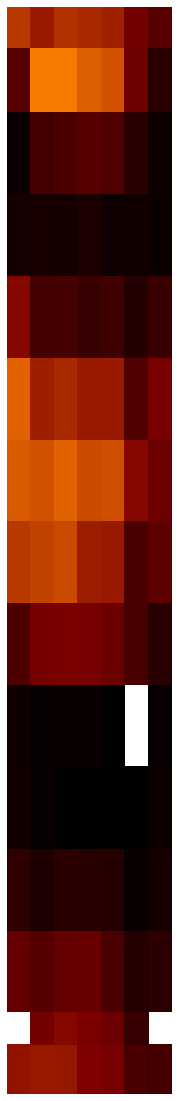

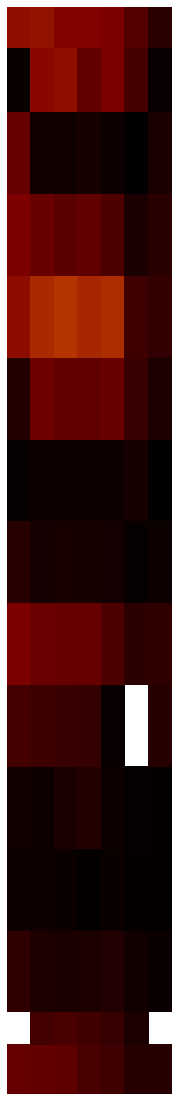

In [5]:
error=0.00075
lower=400
upper=950
tt='reflect'
typ='gaussian'
'''     'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)'''
alanum=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
albnum=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sionum=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sianum=[0,100,250,500,750,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sibnum=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
numbers=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
number=['0000','0100','0250','0500','0750']
for i in range(1000,3001,250):
    number.append(str(i))
number.append('3100')
label=['A','B','C']
total=[alanum,albnum,sionum,sionum,sionum,sianum,sibnum]
fnumber=[]
for iii in number:
    fnumber.append(int(iii))
z=0
xzs=[0.1,0.133,0.154,0.295,0.44]
pos=np.array([0,10,20,30,40,50,60,70])
numbers=np.array([0,150,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3195,3321])
total={}
RR=0
for x in xzs:
    for k in ['AL-B','AL-A','SiO2-A','SiO2-B','SiO2-C','SiC-A','SiC-B']:
            ys=[]
            yns=[]
            xs=[]
            for j in number:
                z+=1
                #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                try:
                    df=pd.read_table('3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j))
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    df.columns=['energyloss','intensity']
                    E=df['energyloss'][lower:upper]
                    I=df['intensity'][lower:upper]
                    df.set_index('energyloss',inplace=True)
                    Tcx=[]
                    Tcy=[]
                    for column in df.index:
                        if column>(-error+x) and column<(x+error):
                            y=df.loc[column].values[0]
                            RR+=1
                            Tcx.append(column)
                            Tcy.append(y)
                            if RR==2:
                                RR=0
                                break
                    Newy=((Tcy[1]-Tcy[0])/(Tcx[1]-Tcx[0])*x+(Tcy[1]-((Tcy[1]-Tcy[0])*Tcx[1])/(Tcx[1]-Tcx[0])))
                    ys.append(Newy)
                except Exception as e:
                    ys.append(np.nan)
                    pass
            total['{}'.format(k)]=ys
    fig= plt.figure(figsize=(2.95,20))
    ax=fig.add_subplot(1,1,1)
    df2=DataFrame(total)*(x)**0.5*4.5
    #print(max(df2.values[0].flatten()))
    #df2.to_csv('EEl={}.csv'.format(x))
    #df1=df2.interpolate(method='from_derivatives', limit_direction='forward', axis=0)
    df1=df2
    #df2/max(df2.values[0].flatten())
    xx=np.linspace(0,7,7)
    yy=numbers
    #img=plt.contourf(xx,yy,df1.values,cmap='hot')
    img=plt.pcolor(pos,numbers,df1.values,cmap='afmhot',vmin=0,vmax=0.1)
    '''norm = colors.Normalize(vmin=-0.001, vmax=0.07)
    img.set_norm(norm)'''
    plt.axis('off')
    #plt.imshow(df1.values,cmap='hot')
    '''for Nu in range(0,7):
        plt.axvline(x=Nu, ymin=0, ymax=1,linewidth=3, color='white')'''
    #plt.title('EEL={}eV'.format("%.3f" % x))
    #display(df1)
    '''fontprops = fm.FontProperties(size=13)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="17%", pad=0.19)
    cbar=plt.colorbar(img, cax=cax)
    cbar.set_ticks([0,1])'''
    textstr='{} meV'.format("%.0f" % (x*1000))
    '''scalebar = AnchoredSizeBar(ax.transData,
                          9,
                          "10nm",
                          loc='lower center',
                          pad=0.1, borderpad=0.1, sep=5,size_vertical=12,
                          frameon=False,
                          bbox_to_anchor=Bbox.from_bounds(0.08, 0.104, 0.85, 0.1),
                          bbox_transform=ax.figure.transFigure)

    ax.add_artist(scalebar)
    scalebar2 = AnchoredSizeBar(ax.transData,
                          2,
                          "250nm",
                          loc='lower center',
                          pad=0.1, borderpad=0.1, sep=5,size_vertical=230,
                          frameon=False,
                          bbox_to_anchor=Bbox.from_bounds(-0.4, 0.395, 0.85, 0.1),
                          bbox_transform=ax.figure.transFigure)

    ax.add_artist(scalebar2)'''
    '''plt.text(0.23, 0.098, textstr, fontsize=20, transform=plt.gcf().transFigure)
    plt.text(-0.25, 0.5, '   ', fontsize=15, transform=plt.gcf().transFigure)
    plt.text(1.2, 0.5, '  ', fontsize=15, transform=plt.gcf().transFigure)'''
    plt.savefig('TEEL={}eV.png'.format("%.0f" % (x*1000)),bbox_inches='tight')

In [29]:
import cv2
import numpy as np
import glob
img_array = []
font= cv2.FONT_HERSHEY_SIMPLEX 
for i in range(450):
    for filename in glob.glob('TEEL={}eV.png'.format("%.0f" % (xzs[i]*1000))):
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height) 
        img_array.append(img)
out = cv2.VideoWriter('R450_60x240_Fr17.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 17, size)
display(len(img_array))
for j in range(len(img_array)):
    out.write(img_array[j])
out.release()

450

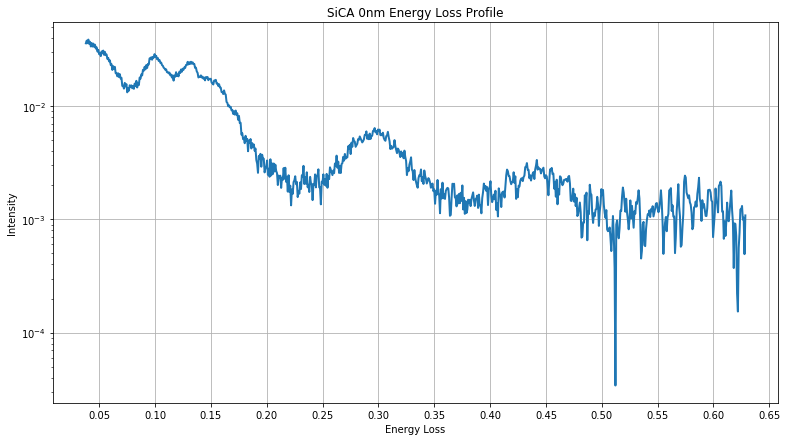

In [12]:
error=0.0006
lower=400
upper=950
Num=300
num=300
tt='reflect'
val=1
typ='gaussian'
'''     'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)'''
alanum=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
albnum=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sionum=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sianum=[0,100,250,500,750,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sibnum=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
numbers=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
number=['0000','0100','0250','0500','0750']
label=['A','B','C']
total=[alanum,albnum,sionum,sionum,sionum,sianum,sibnum]
for i in range(1000,3001,250):
    number.append(str(i))
number.append('3100')
fnumber=[]
for iii in number:
    fnumber.append(int(iii))
z=0
xzs=[0.1,0.133,0.154,0.295,0.44]
pos=np.array([0,10,20,30,40,50,60,70])
numbers=np.array([0,150,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100])
total={}
for x in xzs:
    for k in ['SiC-A','SiC-B']:
            ys=[]
            yns=[]
            xs=[]
            for j in number:
                z+=1
                fig= plt.figure(figsize=(13,7))
                #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                df=pd.read_table('3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j))
                #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                df.columns=['energyloss','intensity']
                E=df['energyloss'][400:]
                I=df['intensity'][400:]
                plt.grid()
                plt.xlabel('Energy Loss')
                plt.ylabel('Intensity')
                plt.title('SiCA 0nm Energy Loss Profile')
                plt.xticks(np.arange(-0.3,0.7,0.05))
                plt.yscale('log')
                plt.plot(E,I,lw=2)
                plt.savefig('SiCloEnergy.png',dpi=800,bbox_inches='tight')
                break
            break
    break

In [198]:
df2

,AL-B,AL-A,SiO2-A,SiO2-B,SiO2-C,SiC-A,SiC-B
0,0.039919,0.042561,0.063483,0.063731,0.062970,0.039117,0.041402
1,NaN,0.030553,0.060763,0.062183,0.061140,0.028348,NaN
2,0.038394,0.029247,0.056348,0.061913,0.066955,0.030764,0.032451
3,0.035995,0.031958,0.054766,0.059118,0.060564,0.033351,0.037218
4,0.030630,0.020400,0.040547,0.046271,0.042605,0.024880,0.029581
5,0.017916,0.032628,0.039124,0.040766,0.022683,NaN,0.027355
6,0.012155,0.009116,0.025519,0.030598,0.027110,0.016216,0.015898
7,0.006344,0.002048,0.019277,0.019998,0.020792,0.009964,0.011224
8,0.006378,0.001481,0.018788,0.021671,0.023825,0.014591,0.012544
9,0.004961,0.010247,0.029417,0.036320,0.037774,0.017789,0.013778


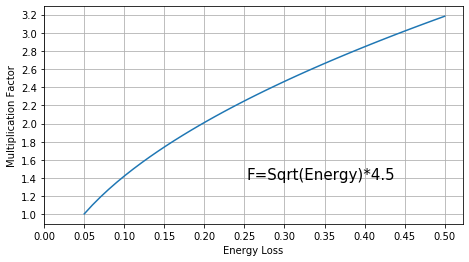

In [13]:
zs=[]
for z in np.linspace(0.05,0.5,45):
    zs.append((z)**0.5*4.5)
fig= plt.figure(figsize=(7.5,4))
plt.plot(np.linspace(0.05,0.5,45),zs)
plt.xlabel('Energy Loss')
plt.ylabel('Multiplication Factor')
plt.xticks(np.arange(0,0.55,0.05))
plt.yticks(np.arange(1,3.3,0.2))
plt.grid()
plt.text(0.5, 0.28, 'F=Sqrt(Energy)*4.5', fontsize=15, transform=plt.gcf().transFigure)
plt.savefig('Mul.png',dpi=600,bbox_inches='tight')

In [11]:
df2

,AL-B,AL-A,SiO2-A,SiO2-B,SiO2-C,SiC-A,SiC-B
0,0.024409,0.025955,0.038546,0.038920,0.038328,0.023676,0.025191
1,NaN,0.018861,0.037080,0.037818,0.037162,0.017380,NaN
2,0.023303,0.017089,0.034297,0.036556,0.040817,0.018755,0.019722
3,0.022241,0.019472,0.033443,0.035615,0.036861,0.020172,0.022646
4,0.018489,0.012377,0.024773,0.027720,0.025965,0.015470,0.017880
5,0.010967,0.019893,0.023672,0.024690,0.013725,NaN,0.016358
6,0.007294,0.005548,0.015491,0.018679,0.016648,0.009890,0.009625
7,0.004063,0.001216,0.011778,0.011969,0.011877,0.005900,0.007038
8,0.003664,0.000893,0.011377,0.013429,0.014368,0.008264,0.007620
9,0.002845,0.006359,0.017804,0.022319,0.022124,0.010964,0.009269


In [14]:
error=0.0008
lower=400
upper=950
Num=300
num=300
tt='reflect'
val=1
typ='gaussian'
'''     'multiquadric': sqrt((r/self.epsilon)**2 + 1)
        'inverse': 1.0/sqrt((r/self.epsilon)**2 + 1)
        'gaussian': exp(-(r/self.epsilon)**2)
        'linear': r
        'cubic': r**3
        'quintic': r**5
        'thin_plate': r**2 * log(r)'''
alanum=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
albnum=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sionum=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sianum=[0,100,250,500,750,1250,1500,1750,2000,2250,2500,2750,3000,3100]
sibnum=[0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
numbers=[0,100,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100]
number=['0000','0100','0250','0500','0750']
for i in range(1000,3001,250):
    number.append(str(i))
number.append('3100')
label=['A','B','C']
total=[alanum,albnum,sionum,sionum,sionum,sianum,sibnum]
fnumber=[]
for iii in number:
    fnumber.append(int(iii))
z=0
xzs=np.linspace(0.05,0.16,80)
pos=np.array([0,10,20,30,40,50,60,70])
numbers=np.array([0,150,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3050,3100])
total={}
whole=[]
RR=0
for x in xzs:
    for k in ['AL-B','AL-A','SiO2-A','SiO2-B','SiO2-C','SiC-A','SiC-B']:
            ys=[]
            yns=[]
            xs=[]
            for j in number:
                z+=1
                #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                try:
                    df=pd.read_table('3p1um-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,j))
                    #print('3p1um-{}-{}-10-1s-{}nm-Subtracted-NElectrons-SM.dat'.format(k,i,j))
                    df.columns=['energyloss','intensity']
                    E=df['energyloss'][lower:upper]
                    I=df['intensity'][lower:upper]
                    df.set_index('energyloss',inplace=True)
                    Tcx=[]
                    Tcy=[]
                    for column in df.index:
                        if column>(-error+x) and column<(x+error):
                            y=df.loc[column].values[0]
                            RR+=1
                            Tcx.append(column)
                            Tcy.append(y)
                            if RR==2:
                                RR=0
                                break
                    Newy=((Tcy[1]-Tcy[0])/(Tcx[1]-Tcx[0])*x+(Tcy[1]-((Tcy[1]-Tcy[0])*Tcx[1])/(Tcx[1]-Tcx[0])))
                    ys.append(Newy)
                except Exception as e:
                    ys.append(np.nan)
                    pass
            total['{}'.format(k)]=ys
    '''fig= plt.figure(figsize=(2.95,20))
    ax=fig.add_subplot(1,1,1)'''
    df2=DataFrame(total)
    whole.append(max(df2.values[0].flatten()))
print(max(whole))

0.04170221347896075


In [13]:
whole

[0.032195241479836545,
 0.031442346432916074,
 0.031427611074049656,
 0.031178357373020604,
 0.029198755518345512,
 0.027943246312031794,
 0.025629031517043772,
 0.02353283688823493,
 0.02212647641323733,
 0.021706262481345148,
 0.020426621754350685,
 0.01748131578176633,
 0.016553252193541125,
 0.016192011441240863,
 0.015568572241397158,
 0.015485066785685883,
 0.015762166306836328,
 0.0171455434405728,
 0.017951374674031725,
 0.01871898670705665,
 0.020923237833322644,
 0.022246406530552487,
 0.02466065835707501,
 0.0280412079915697,
 0.030285833923503036,
 0.03211913114191031,
 0.033370885864572666,
 0.03256202961288515,
 0.030759031663791857,
 0.030154514160271144,
 0.028201923897432063,
 0.025428325032284566,
 0.02566576667108511,
 0.024046585203261195,
 0.023276555342491886,
 0.024158026931503374,
 0.025734715679339062,
 0.027468148767921474,
 0.02951110212966418,
 0.029300804663765046,
 0.03084899532840138,
 0.03359051840880467,
 0.03603390240776275,
 0.038878820896535174,
 0.0

In [35]:
0.024118801021472448-(0.024118801021472448-0.02440880609093533)/(0.13352506850298404-0.13278411750298402)*0.13352506850298404

0.0763799448302306

In [36]:
0.0763799448302306+-0.052055634230283115

0.024324310599947482

In [38]:
Tcy

[0.02440880609093533, 0.024118801021472448]